60201359 이주영

In [2]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

df=pd.read_csv("data/winequality-red.csv")

print(df.shape)
df.head()

#결측치 확인
df.isnull().sum()

#등급 분포도 확인
df["quality"].value_counts()

#3 4, 5 6, 7 8로 분류 (상-1 중-2 하-3)
df["quality3"]=df.quality.map(lambda x:1 if x<5 else 2 if x<7 else 3)
df.head()

X = np.array(df.drop(['quality','quality3'],axis=1))
y = np.array(df['quality3'])
X

y

#트레이닝세트와 테스트세트로 데이터 구분
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

print("X_train 크기:", X_train.shape)
print("y_train 크기:", y_train.shape)
print("X_test 크기:", X_test.shape)
print("y_test 크기:", y_test.shape)

#의사결정나무 모델 데이터 적합 확인
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(random_state=0) #max미지정
tree.fit(X_train, y_train)

#모델성능평가
temp_y_pred = tree.predict(X_test)

#training 값을 X_test에서 넣음
print('예측값\n', temp_y_pred)
print('실제값\n', y_test)

#정확도 계산
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

temp_acc = accuracy_score(y_test, temp_y_pred)
#y_test와 temp_y_pred로 예측한 값을 적용하여 temp_acc를 추출함

print('정확도: ', format(temp_acc))

#오차행렬(Confusion Matrix)
print(confusion_matrix(y_test, temp_y_pred))

(1599, 12)
X_train 크기: (1119, 11)
y_train 크기: (1119,)
X_test 크기: (480, 11)
y_test 크기: (480,)
예측값
 [2 1 3 2 2 2 2 2 1 2 2 2 2 1 3 2 3 2 2 2 3 2 2 1 2 2 2 3 2 2 2 2 2 2 3 3 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 2 2 2 3 2 2 2 1 2
 2 2 2 2 2 3 2 2 3 2 2 2 1 2 2 2 2 2 2 2 3 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 3 2 2 2 2 3 2 2 2 3 1 2 3 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2
 2 2 3 3 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 3 2 2 2 1 2 2 3 2 2 3 3 2 2 3 2 2 2
 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 3 2 2 2 2
 3 2 2 2 3 3 2 2 2 2 2 2 3 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 3 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 3 2 2 3 2 2 2 2 2 3 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 3 3 2 3 2 1 2 3 2 1 3 2 2 2 3 2 2
 3 2 2 3 2 2 2 2 2 2 3 2 2 2 2 3 3 2 3 2 1 3 1 2 3 2 3 2 2 2 2 3 2 2 3 2 2
 2 2 2 2 1 2 3 2 2 2 2 2 2 2 2 2 2 3 2 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 2 2 2 2 2 1 2 2 2 1 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2
 3

In [3]:
!pip install imblearn

In [4]:
from imblearn.over_sampling import SMOTE

sm= SMOTE(random_state=0)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train,y_train)

print("X_train_balanced 크기: ", X_train_balanced.shape)
print("y_train_balanced 크기: ", y_train_balanced.shape)

X_train_balanced 크기:  (2721, 11)
y_train_balanced 크기:  (2721,)


In [5]:
#의사결정나무 모델 데이터 적합 확인
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(random_state=0) #max미지정
tree.fit(X_train, y_train)

#모델성능평가
temp_y_pred = tree.predict(X_test)

#training 값을 X_test에서 넣음
print('예측값\n', temp_y_pred)
print('실제값\n', y_test)

#정확도 계산
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

temp_acc = accuracy_score(y_test, temp_y_pred)
#y_test와 temp_y_pred로 예측한 값을 적용하여 temp_acc를 추출함

print('정확도: ', format(temp_acc))

#오차행렬(Confusion Matrix)
print(confusion_matrix(y_test, temp_y_pred))

예측값
 [2 1 3 2 2 2 2 2 1 2 2 2 2 1 3 2 3 2 2 2 3 2 2 1 2 2 2 3 2 2 2 2 2 2 3 3 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 2 2 2 3 2 2 2 1 2
 2 2 2 2 2 3 2 2 3 2 2 2 1 2 2 2 2 2 2 2 3 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 3 2 2 2 2 3 2 2 2 3 1 2 3 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2
 2 2 3 3 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 3 2 2 2 1 2 2 3 2 2 3 3 2 2 3 2 2 2
 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 3 2 2 2 2
 3 2 2 2 3 3 2 2 2 2 2 2 3 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 3 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 3 2 2 3 2 2 2 2 2 3 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 3 3 2 3 2 1 2 3 2 1 3 2 2 2 3 2 2
 3 2 2 3 2 2 2 2 2 2 3 2 2 2 2 3 3 2 3 2 1 3 1 2 3 2 3 2 2 2 2 3 2 2 3 2 2
 2 2 2 2 1 2 3 2 2 2 2 2 2 2 2 2 2 3 2 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 2 2 2 2 2 1 2 2 2 1 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2
 3 2 2 2 3 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
실제값
 [2 2 3 2 2 2 2 2

In [6]:
#모델 성능
print(classification_report(y_test,tree.predict(X_test)))

              precision    recall  f1-score   support

           1       0.19      0.17      0.18        18
           2       0.92      0.88      0.90       412
           3       0.44      0.62      0.51        50

    accuracy                           0.82       480
   macro avg       0.51      0.55      0.53       480
weighted avg       0.84      0.82      0.83       480



a=pd.DataFrame(tree.feature_importances_.reshape((1,-1)), index=['feature_importance'])
a

tree.predict(X_test)
#ROC실습

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(X_test)[:,1])

#ROC curve 그래프 그리기
plt.plot(fpr, tpr, '-', ms=2, label="Decision Tree")
plt.plot([0,1],[0,1],'--',label="Random Guess")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

#AUC 계산
from sklearn import metrics
roc_auc=metrics.auc(fpr,tpr)
print('Area Under Curve : %0.2f'% roc_auc)

In [10]:
a=pd.DataFrame(tree.feature_importances_.reshape((1,-1)), index=['feature_importance'])
a

,0,1,2,3,4,5,6,7,8,9,10
feature_importance,0.070892,0.132708,0.064613,0.086827,0.063031,0.094609,0.073773,0.06778,0.080589,0.080239,0.184939


In [17]:
aa={
    'feature' : ['0','1','2','3','4','5','6','7','8','9','10'],
    'score': [0.070892, 0.132708,0.064613,0.086827,0.063031,0.094609,0.073773,0.06778,0.080589,0.080239,0.184939]
}
aa

{'feature': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'],
 'score': [0.070892,
  0.132708,
  0.064613,
  0.086827,
  0.063031,
  0.094609,
  0.073773,
  0.06778,
  0.080589,
  0.080239,
  0.184939]}

<BarContainer object of 11 artists>

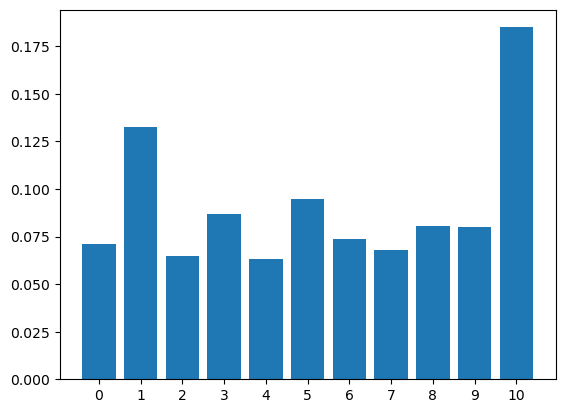

In [18]:
import matplotlib
plt.bar(aa['feature'], aa['score'])

plt.figure()
plt.bar(range(X.shape[1]), feature_importance[indices], color="r",
        yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

<후기>

6개의 등급을 2개씩 3개로 분류하였고, 데이터 중에 필요없는 것을 빼는 전처리 과정을 거치지 않고 모델을 만든 결과 정확도가 약 82%였다.
만약 와인에 대한 이해도가 높은 상태에서 본 데이터를 봤을 때, 적합한 데이터를 골라 더 정확도 높은 예측 모델을 만들 수도 있을 거라 생각한다.